In [1]:
import torch
import torch.nn as nn 
import torchvision 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784  # 28x28
hidden_size = 100 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

### Load Data

In [2]:
train_dataset = torchvision.datasets.MNIST(root = './data', train=True, transform = transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root = './data', train=False, transform = transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



### Data loader 

In [3]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


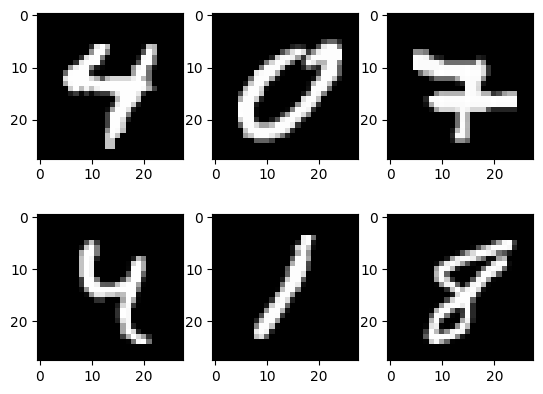

In [6]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap = 'gray')
plt.show()

### Build a model

In [7]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

### Loss and Optimizer

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

### Training Loop

In [11]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100. 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


epoch 1/2, step 100/600, loss = 0.3857
epoch 1/2, step 200/600, loss = 0.4791
epoch 1/2, step 300/600, loss = 0.2565
epoch 1/2, step 400/600, loss = 0.1576
epoch 1/2, step 500/600, loss = 0.2774
epoch 1/2, step 600/600, loss = 0.1862
epoch 2/2, step 100/600, loss = 0.1904
epoch 2/2, step 200/600, loss = 0.1349
epoch 2/2, step 300/600, loss = 0.1426
epoch 2/2, step 400/600, loss = 0.2041
epoch 2/2, step 500/600, loss = 0.1444
epoch 2/2, step 600/600, loss = 0.1025


### Testing

In [12]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0 
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # returns value and index
        _ , predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')



accuracy = 95.44
